

## Data Studio Project 01: Size of Residential Apartments in South Korea 

Dongjin Lee  
dl3072@columbia.edu

### 1. Summary. 

The purpose of this analysis is to understand the statistics regarding the size(sq.meter) of apartments in South Korea using Python.

Inspired link : https://www.washingtonpost.com/world/after-decades-of-economic-growth-south-korea-is-the-land-of-apartments/2013/09/15/9bd841f8-1c55-11e3-8685-5021e0c41964_story.html

### 2. Data Diary

South Korea consists of 10 provinces & 8 metropolitan cities.  (See image A below). Most apartments are concentrated in Metro Cities and Kyungi, a Province Area near Seoul. There are apartments in other provinces, because the amount of data is reletively small, they were ignored from the analysis.SQL has been used to collect database. 

======================================================================================================================
#### 2-1 : Background
Image - City and Province of South Korea

"https://en.wikipedia.org/wiki/Provinces_of_Korea#/media/File:Provinces_of_South_Korea_(numbered_map).png"

#####           8 Metropolitan Cities
Seoul (1), Busan (2), Daegu (3), Incheon (4), Gwangju (5), Daejeon (6), Ulsan(7), Saejong(8) 

#####           Suburban province containing majority of Apartments in South Korea:
Kyungi  (A)

=====================================================================================================================

#### 2-2 :Data Location & Sources

Data location, Study Material Location, and Origin of Codes & Idiom
All Right reserved. Source, Data, Coding Method to orginal locaiton of link mentioned below.

- Korean Apartment(Residential Property) Management Info System : http://www.k-apt.go.kr
- South Korea Ministry of Land and Infrastructure and Transportation : http://rt.molit.go.kr
- LEDE Program : http://ledeprogram.com/
- Openwings : http://goodvc.tistory.com/category/%EB%82%98%EC%9D%98%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D
- Code academy : https://www.codecademy.com/ko/courses/python-advanced-ko/0/1?curriculum_id=53b5e0d8fed2a81590000003
- Haeshik : http://nbviewer.ipython.org/gist/hyeshik/cf9f3d7686e07eedbfda?revision=6
- other minor codes from the Stack Overflow

In [1]:
# import packages 
import pandas as pd                   # dataframe
import matplotlib.pyplot as plt       # graphs & other analysis
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 
import datetime as dt                 # data/ time
%matplotlib inline
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
# import collected data (Excel Format)
path = 'C:\\Users\\Dongjin\\Desktop\\data\\DB01_Initial_collection.xlsx'
Apartment_data = pd.read_excel(path)

In [3]:
Apartment_data.shape

(21675, 17)

#### 2-3 Data Dictionary

The original data set has 20 objects initially. However, during the data cleansing phase, it has been narrowed down to 17 objects. Therefore, it only contains 17 columns. The following is the data dictionary of our dataset.

In [4]:
path2 = 'C:\\Users\\Dongjin\\Desktop\\data\\dictionary.xlsx'
dictionary = pd.read_excel(path2)
dictionary

,Column / Object,Meaning
0,RecNo,Reference number
1,KAPT_USEDATE,Date built on the Apartment
2,BJ,Code number of the City
3,si,City name (Korean)
4,City,City name (English)
5,KAPTD_WTIMESUB,Time
6,SUBWAY_STATION,Subway station near the Apartment
7,SUBWAY_LINE,Subway line which stations cross
8,CODE_HALL,Apartment Type
9,KAPT_BCOMPANY,Apartment Construction Company


In [5]:
# Copying Data and preserve original data
# checking the size of the data
df = Apartment_data
df.shape

(21675, 17)

#### As mentioned in the dictionary above, in the excel sheet there are 4 columns which counted number of units based on the floor-size categorized as follows.

    KAPTDA_CNT1 = 135㎡ < 
    KAPTDA_CNT2 = 85㎡~135㎡
    KAPTDA_CNT3 = 60㎡~85㎡
    KAPTDA_CNT4 = < 60㎡
    

In [6]:
# Renaming the Column name in the dataframe
df.rename(columns={'KAPTDA_CNT4': 'less_than_60sqm','KAPTDA_CNT3': '60sqm-85sqm'\
                       ,'KAPTDA_CNT2': '85sqm-135sqm','KAPTDA_CNT1': '135sqm<'}, inplace=True)

In [7]:
# Insert the column Total which counts the entire number of unit apartments
df['Total'] = df['less_than_60sqm'] +  df['60sqm-85sqm'] +  df['85sqm-135sqm'] +  df['135sqm<']

In [8]:
# Confirm the copied dataframe
df.head(1)

,RecNo,KAPT_USEDATE,BJ,si,City,KAPTD_WTIMESUB,SUBWAY_STATION,SUBWAY_LINE,CODE_HALL,KAPT_BCOMPANY,KAPT_CODE,Name,KAPT_DONG_CNT,135sqm<,85sqm-135sqm,60sqm-85sqm,less_than_60sqm,Total
0,1,2004-06-17,11,서울특별시,Seoul,5-10 minutes,대청,3호선,계단식,화엄건설,A13593901,LG개포자이아파트,4,0,0,0,212,212


## 3. Analysis


### 3-2. Large Apartment Ratio

According to the Korean Government, residential properties larger than 914 sq ft are considered "large residential property" for tax purpose. I decide to figure out the number of such large apartments in our data set and its ratio to the entire market.

Large Apartment Ratio  = (Number of Large residential properties larger than 914 sq ft )/(Number of Entire Residential Property)

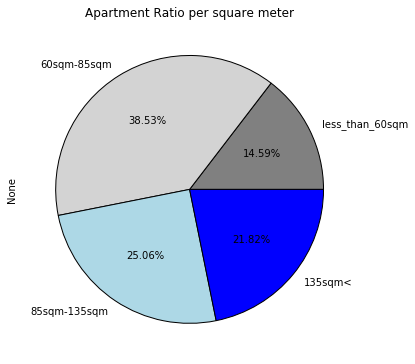

In [9]:
Chart1 = df[['less_than_60sqm','60sqm-85sqm','85sqm-135sqm','135sqm<']].sum()
fig = plt.figure(figsize=(6,6))
piechart1 = Chart1.plot(kind='pie', figsize=(6,6),colors=('grey','lightgrey','lightblue','blue'),autopct='%.2f%%')
piechart1.set_title('Apartment Ratio per square meter')

In [10]:
df['Small(Total)'] = df['less_than_60sqm']+df['60sqm-85sqm']
df['Large(Total)'] = df['85sqm-135sqm']+df['135sqm<']
Chart2 = df[['Small(Total)','Large(Total)']].sum()

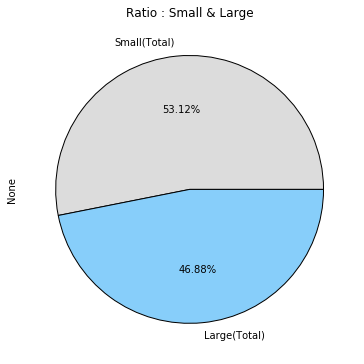

In [11]:
fig = plt.figure(figsize=(6,6))
piechart2 = Chart2.plot(kind='pie', figsize=(6,6),colors=('gainsboro','lightskyblue'), autopct='%.2f%%')
piechart2.set_title('Ratio : Small & Large')

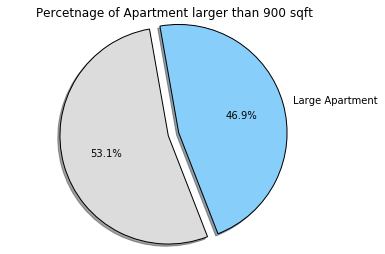

In [12]:
# I would like to use second pie chart only and make this fancy.
 
# Data to plot
fig = plt
labels = '', 'Large Apartment'
sizes = [53.12 , 46.88]
colors = ['gainsboro', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
fancy_pie = plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=100)
 
plt.axis('equal')
plt.title('Percetnage of Apartment larger than 900 sqft')
plt.savefig("output-graph_00.pdf", transparent=True)

### 3-2. Annual Growth in Apartment Units

In [13]:
# Since the data does not recognize it as a string, converted them to date
df['Dates'] = pd.to_datetime(df['KAPT_USEDATE'],format="%m/%d/%Y")

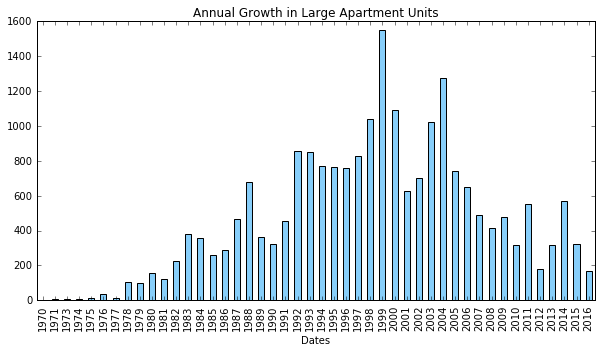

In [14]:
# Now we decide to gather them by year, and plot them with the relative size.
Annualgrowth = df.groupby(df['Dates'].map(lambda x: x.year))
Annualgrowthgraph = Annualgrowth.count()['Large(Total)'].plot(kind='bar',title='Annual Growth in Large Apartment Units',color = 'lightskyblue',figsize=(10,5))

plt.savefig("output-graph_00_01.pdf", transparent=True)

### 3-3. Large Apartment in Each Individual City
Now lets find out the number and ratio of large apartments in each city.

In [15]:
grouped = df.groupby(['City'])

In [16]:
Chart3 = grouped.agg({'Small(Total)':np.sum,'Large(Total)':np.sum, 'Total':np.sum } , as_index=False ).sort(['Total'])
Chart3['Small(Ratio)'] = Chart3['Small(Total)'] /  Chart3['Total']
Chart3['Large(Ratio)'] = Chart3['Large(Total)'] /  Chart3['Total']

c:\users\dongjin\envs\03stat\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


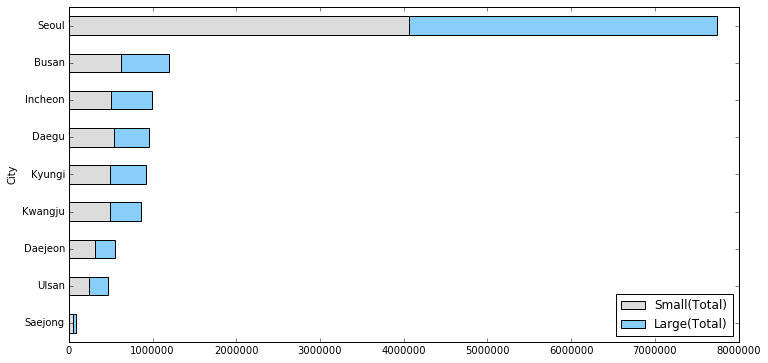

In [17]:
chart3_plot = Chart3[['Small(Total)','Large(Total)']].plot(kind='barh', stacked=True, color =('gainsboro','lightskyblue'), title='',figsize=(12,6))
plt.savefig("output-graph_01.pdf", transparent=True)

Since Seoul is the capital and nearly half of the population resides there, the amount of apartment is far exceeds any other city. But what about the ratio? Let's find out. 

c:\users\dongjin\envs\03stat\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


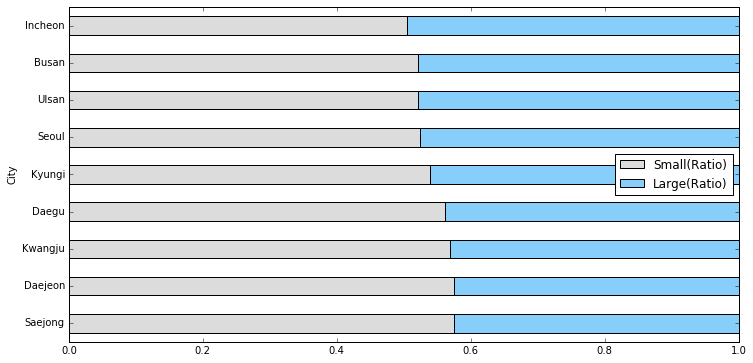

In [18]:
Chart3[['Small(Ratio)','Large(Ratio)']].sort('Large(Ratio)').plot(kind='barh', stacked=True, color =('gainsboro','lightskyblue'),figsize=(12,6))
plt.savefig("output-graph_02.pdf", transparent=True)

### 3-4. Factors Correlated to the Large Apartment Ratio
Tested correlation of two factors: city budget and average GDP of the city toward large apartment ratio.

In [19]:
# City Budget (Unit : 10,000 Won )
list = '''Seoul 342,751 144,328 50,993 2,231 50,362 18,603 18,182 9,560 48,492 80.0 81.2
Busan 122,222 34,647 12,207 10,658 37,213 6,932 4,639 4,746 11,180 51.4 66.6
Daegu 87,347 22,474 6,545 10,663 28,021 5,289 2,830 2,709 8,816 46.1 67.6
Incheon 113,513 30,741 19,157 5,658 28,964 6,534 3,474 8,436 10,549 62.6 71.8
Kwangju 51,727 12,174 4,115 6,247 18,373 3,470 1,946 1,516 3,886 41.9 62.5
Daejeon 50,277 13,466 4,092 4,683 15,145 4,429 1,722 1,055 5,685 49.4 66.6
Ulsan 42,370 14,002 4,300 1,888 10,054 2,285 1,799 850 7,192 61.4 69.4
Saejong 7,606 2,534 845 1,540 1,616 - - 95 976 47.6 77.3
Kyungi 102,961 132,107 51,285 22,502 102,446 14,558 17,132 7,907 55,024 61.2 71.5
Kangwon 108,044 13,129 7,398 33,219 38,622 3,698 1,229 1,346 9,403 22.2 68.3'''.replace(',','').split()
dim2 = np.reshape(list,(10,12))
budget = pd.DataFrame(dim2[:,1], index=dim2[:,0], columns=['Budget']).astype(float)

In [20]:
# GDP of each city (Unit : 10,000 Won )
list = """ Seoul Busan Daegu Incheon Kwangju Daejeon Ulsan Kyungi Kangwon Saejong 
1,752 1,505 1,431 1,380 1,405 1,489 1,031 1,429 1,288 1,339
""".replace(",","").split()

gdp = pd.DataFrame(list[10:], index=list[0:10], columns=['GDP']).astype(float)

In [21]:
# Average Spending of each city (Unit : 10,000 Won )
list = """ Seoul Busan Daegu Incheon Kwangju Daejeon Ulsan Kyungi Kangwon Saejong 
1198 1010 982 973 977 981 959 966 907 869
""".replace(",","").split()

spending = pd.DataFrame(list[10:], index=list[0:10], columns=['Spending']).astype(float)

In [22]:
# Combine Large Apartment ratio , City Budget and GDP
Combined = Chart3.join(budget).join(gdp).join(spending).dropna()
Combined = Combined[['Large(Ratio)','Budget','GDP','Spending']].sort(['GDP'])

c:\users\dongjin\envs\03stat\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


In [23]:
print(plt.style.available)

['dark_background', 'fivethirtyeight', 'seaborn-bright', 'seaborn-dark', 'seaborn-pastel', 'seaborn-deep', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-muted', 'seaborn-dark-palette', 'ggplot', 'seaborn-paper', 'seaborn-poster', 'seaborn-colorblind', 'seaborn-darkgrid', 'grayscale', 'seaborn-ticks', 'bmh', 'seaborn-talk', 'classic', 'seaborn-notebook']


         Large(Ratio)    Budget     GDP  Spending
City                                             
Ulsan        0.479176   42370.0  1031.0     959.0
Saejong      0.425380    7606.0  1339.0     869.0
Incheon      0.495111  113513.0  1380.0     973.0
Kwangju      0.430822   51727.0  1405.0     977.0
Kyungi       0.461270  102961.0  1429.0     966.0
Daegu        0.438161   87347.0  1431.0     982.0
Daejeon      0.425527   50277.0  1489.0     981.0
Busan        0.479424  122222.0  1505.0    1010.0
Seoul        0.475617  342751.0  1752.0    1198.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A815748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000000008BA1FD0>], dtype=object)

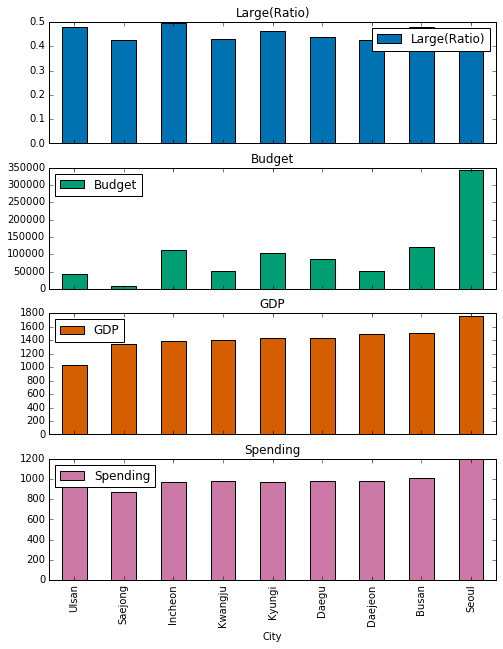

In [24]:
# Table and Graph`
print(Combined)
plt.style.use('seaborn-colorblind')
Combined.plot(kind='bar',subplots=True, figsize=(8,10))

In [25]:
corr_table = Combined.corr()
corr_table

,Large(Ratio),Budget,GDP,Spending
Large(Ratio),1.000000,0.485776,-0.035864,0.398323
Budget,0.485776,1.000000,0.743030,0.953182
GDP,-0.035864,0.743030,1.000000,0.708999
Spending,0.398323,0.953182,0.708999,1.000000


In [26]:
import statsmodels.formula.api as smf # package we'll be using for linear regression

In [27]:
lm = smf.ols(formula="Budget~Spending",data=Combined).fit() #notice the formula regresses Y on X (Y~X)

In [28]:
intercept, slope = lm.params #assign those values to variables

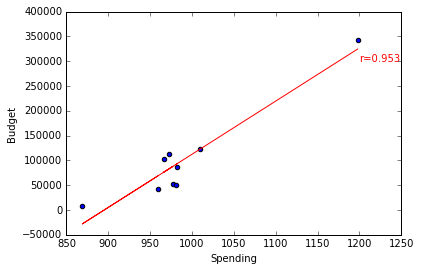

In [29]:
Combined.plot(kind="scatter",x="Spending",y="Budget")
plt.plot(Combined["Spending"],slope*Combined["Spending"]+intercept,"-",color="red")#we create the best fit line from the values in the fit model
r = corr_table['Spending']['Budget']
plt.text(1200,300000,'r={:.3f}'.format(r), color = "red" )
plt.savefig("output-graph_06.pdf", transparent=True)

In [30]:
# Define and modify the function correlation

def plot_correlation( ds, x, y, dotcolor, linecolor, ylim=(1200,1999) ):
    plt.xlim(.35,.65)
    plt.ylim(ylim[0],ylim[1])
    plt.scatter(ds[x], ds[y], alpha=0.6, s=50, c=dotcolor) 
    for abc, row in ds.iterrows():
        plt.text(row[x], row[y],abc )
    plt.xlabel(x)
    plt.ylabel(y)
    
    # Correlation 
    trend_variable = np.poly1d(np.polyfit(ds[x], ds[y], 1))
    trendx = np.linspace(0.3, 0.6, 4)
    plt.plot(trendx, trend_variable(trendx), color=linecolor) 
    r = sp.stats.pearsonr(ds[x],ds[y])
    plt.text(trendx[3], trend_variable(trendx[3]),'r={:.3f}'.format(r[0]), color = linecolor )
    plt.tight_layout()

In [31]:
import scipy as sp
from scipy import stats  

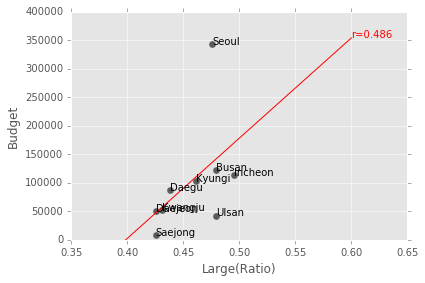

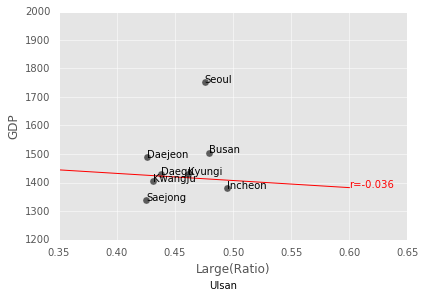

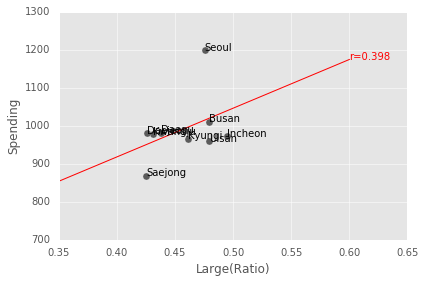

In [34]:
plt.style.use('ggplot')
plot01 = plt.figure(figsize=(10,10))
fig, ax = plt.subplots()

plot_correlation( Combined,'Large(Ratio)' , 'Budget', 'Black','red' , ylim=(0,399999))

# # #grid
# # ax.grid(linestyle='-')
# # ax.spines['top'].set_visible(False)
# # ax.spines['bottom'].set_visible(True)
# # ax.spines['left'].set_visible(False)
# # ax.spines['right'].set_visible(False)


# # # ticks 
# # plt.tick_params(
# #     top = 'off', # ticks along the top edge are off
# #     left = 'off', # ticks along the left are off
# #     right = 'off',# ticks along the right are off
# #     bottom = 'off',# ticks along the bottom are off
# #     labeltop = 'off', # top label
# #     labelbottom = 'off') #bottom label

# ax.minorticks_on()
# # Customize the major grid
# ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# # Customize the minor grid
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')

plt.savefig("output-graph_03.pdf", transparent=True)

plot01 = plt.figure(figsize=(10,20))
fig, ax = plt.subplots()
plot_correlation( Combined, 'Large(Ratio)', 'GDP', 'black','red')

# ticks 
plt.tick_params(
    top = 'off', # ticks along the top edge are off
    left = 'off', # ticks along the left are off
    right = 'off',# ticks along the right are off
    bottom = 'off',# ticks along the bottom are off
    labeltop = 'off', # top label
    labelbottom = 'on') #bottom label
# ax.minorticks_on()
# # Customize the major grid
# ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
# # Customize the minor grid
# ax.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgrey')
    
plt.savefig("output-graph_04.pdf", transparent=True)

plot01 = plt.figure(figsize=(10,20))
fig, ax = plt.subplots()
plot_correlation( Combined, 'Large(Ratio)', 'Spending', 'black','red', ylim=(700,1300) )

# ticks 
plt.tick_params(
    top = 'off', # ticks along the top edge are off
    left = 'off', # ticks along the left are off
    right = 'off',# ticks along the right are off
    bottom = 'off',# ticks along the bottom are off
    labeltop = 'off', # top label
    labelbottom = 'on') #bottom label
    
plt.savefig("output-graph_05.pdf", transparent=True)


Found that the ratio of large apartment has high correlation with city budget, and not much with average GDP of the city.

### Conclusion

The ratio of Large Apartments were relatively consistent regardless of the city, and that the number of large apartments correlated postively with the city budget, but no relationship was found between the city GDP and number of large apartments, which is implies that city's budgets are not necessarily directly correlated with the city's GDPs. 

..